In [1]:
import pandas as pd
from sklearn import ensemble
# строка ниже открывает графики на этой же странице, без неё будет в новом окне
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

from sklearn import cross_validation
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X = pd.read_csv('X_train.txt', index_col=False, sep=" ", header=None)
y = pd.read_csv('y_train.txt', index_col=False, header=None)

In [9]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
y[0].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [130]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,10000,0.0000,0.000000,0,0,0,0,0
1,10000,0.0000,0.000000,0,0,0,0,0
2,10000,0.0000,0.000000,0,0,0,0,0
3,10000,0.0000,0.000000,0,0,0,0,0
4,10000,0.0000,0.000000,0,0,0,0,0
5,10000,0.0000,0.000000,0,0,0,0,0
6,10000,0.0000,0.000000,0,0,0,0,0
7,10000,0.0000,0.000000,0,0,0,0,0
8,10000,0.0000,0.000000,0,0,0,0,0
9,10000,0.0000,0.000000,0,0,0,0,0


In [3]:
newX = X.copy()

# remove columns without data
for column in newX.columns:
    if newX[column].min() == 0 and newX[column].max() == 0:
        newX.drop(column, axis=1, inplace=True)

In [85]:
print len(newX.columns)
newX.describe()

673


,35,36,37,38,39,40,41,42,43,44,...,769,770,771,772,773,774,775,776,777,778
count,10000.0000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0102,0.034700,0.0555,0.057600,0.114200,0.107000,0.123500,0.108500,0.138900,0.166600,...,0.664700,0.692800,0.545100,0.400300,0.260000,0.198500,0.101000,0.056700,0.034500,0.033700
std,1.0200,2.704816,3.4434,2.654654,4.899465,4.275509,4.690186,4.584564,4.672686,5.850236,...,11.373144,11.500237,9.974854,8.337938,6.172278,5.933449,3.710441,3.319004,2.087282,2.048557
min,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.0000,254.000000,253.0000,158.000000,253.000000,234.000000,254.000000,254.000000,232.000000,255.000000,...,255.000000,255.000000,255.000000,253.000000,252.000000,254.000000,254.000000,253.000000,187.000000,154.000000


In [164]:
463#pd.set_option('display.max_rows', 30)
a = newX.std().round(2).order()
a.index[-100:]

Int64Index([325, 432, 655, 604, 522, 352, 209, 326, 297, 402, 235, 211, 380,
            493, 656, 210, 186, 298, 299, 351, 438, 265, 290, 548, 460, 520,
            212, 571, 243, 181, 577, 318, 521, 214, 346, 271, 545, 601, 239,
            631, 240, 213, 353, 374, 489, 599, 463, 572, 291, 547, 519, 269,
            436, 602, 236, 549, 600, 410, 518, 465, 576, 270, 574, 263, 546,
            575, 241, 603, 492, 598, 238, 354, 237, 382, 573, 405, 381, 264,
            242, 490, 379, 491, 182, 629, 464, 626, 630, 628, 434, 409, 433,
            185, 184, 462, 437, 183, 461, 627, 406, 378],
           dtype='int64')

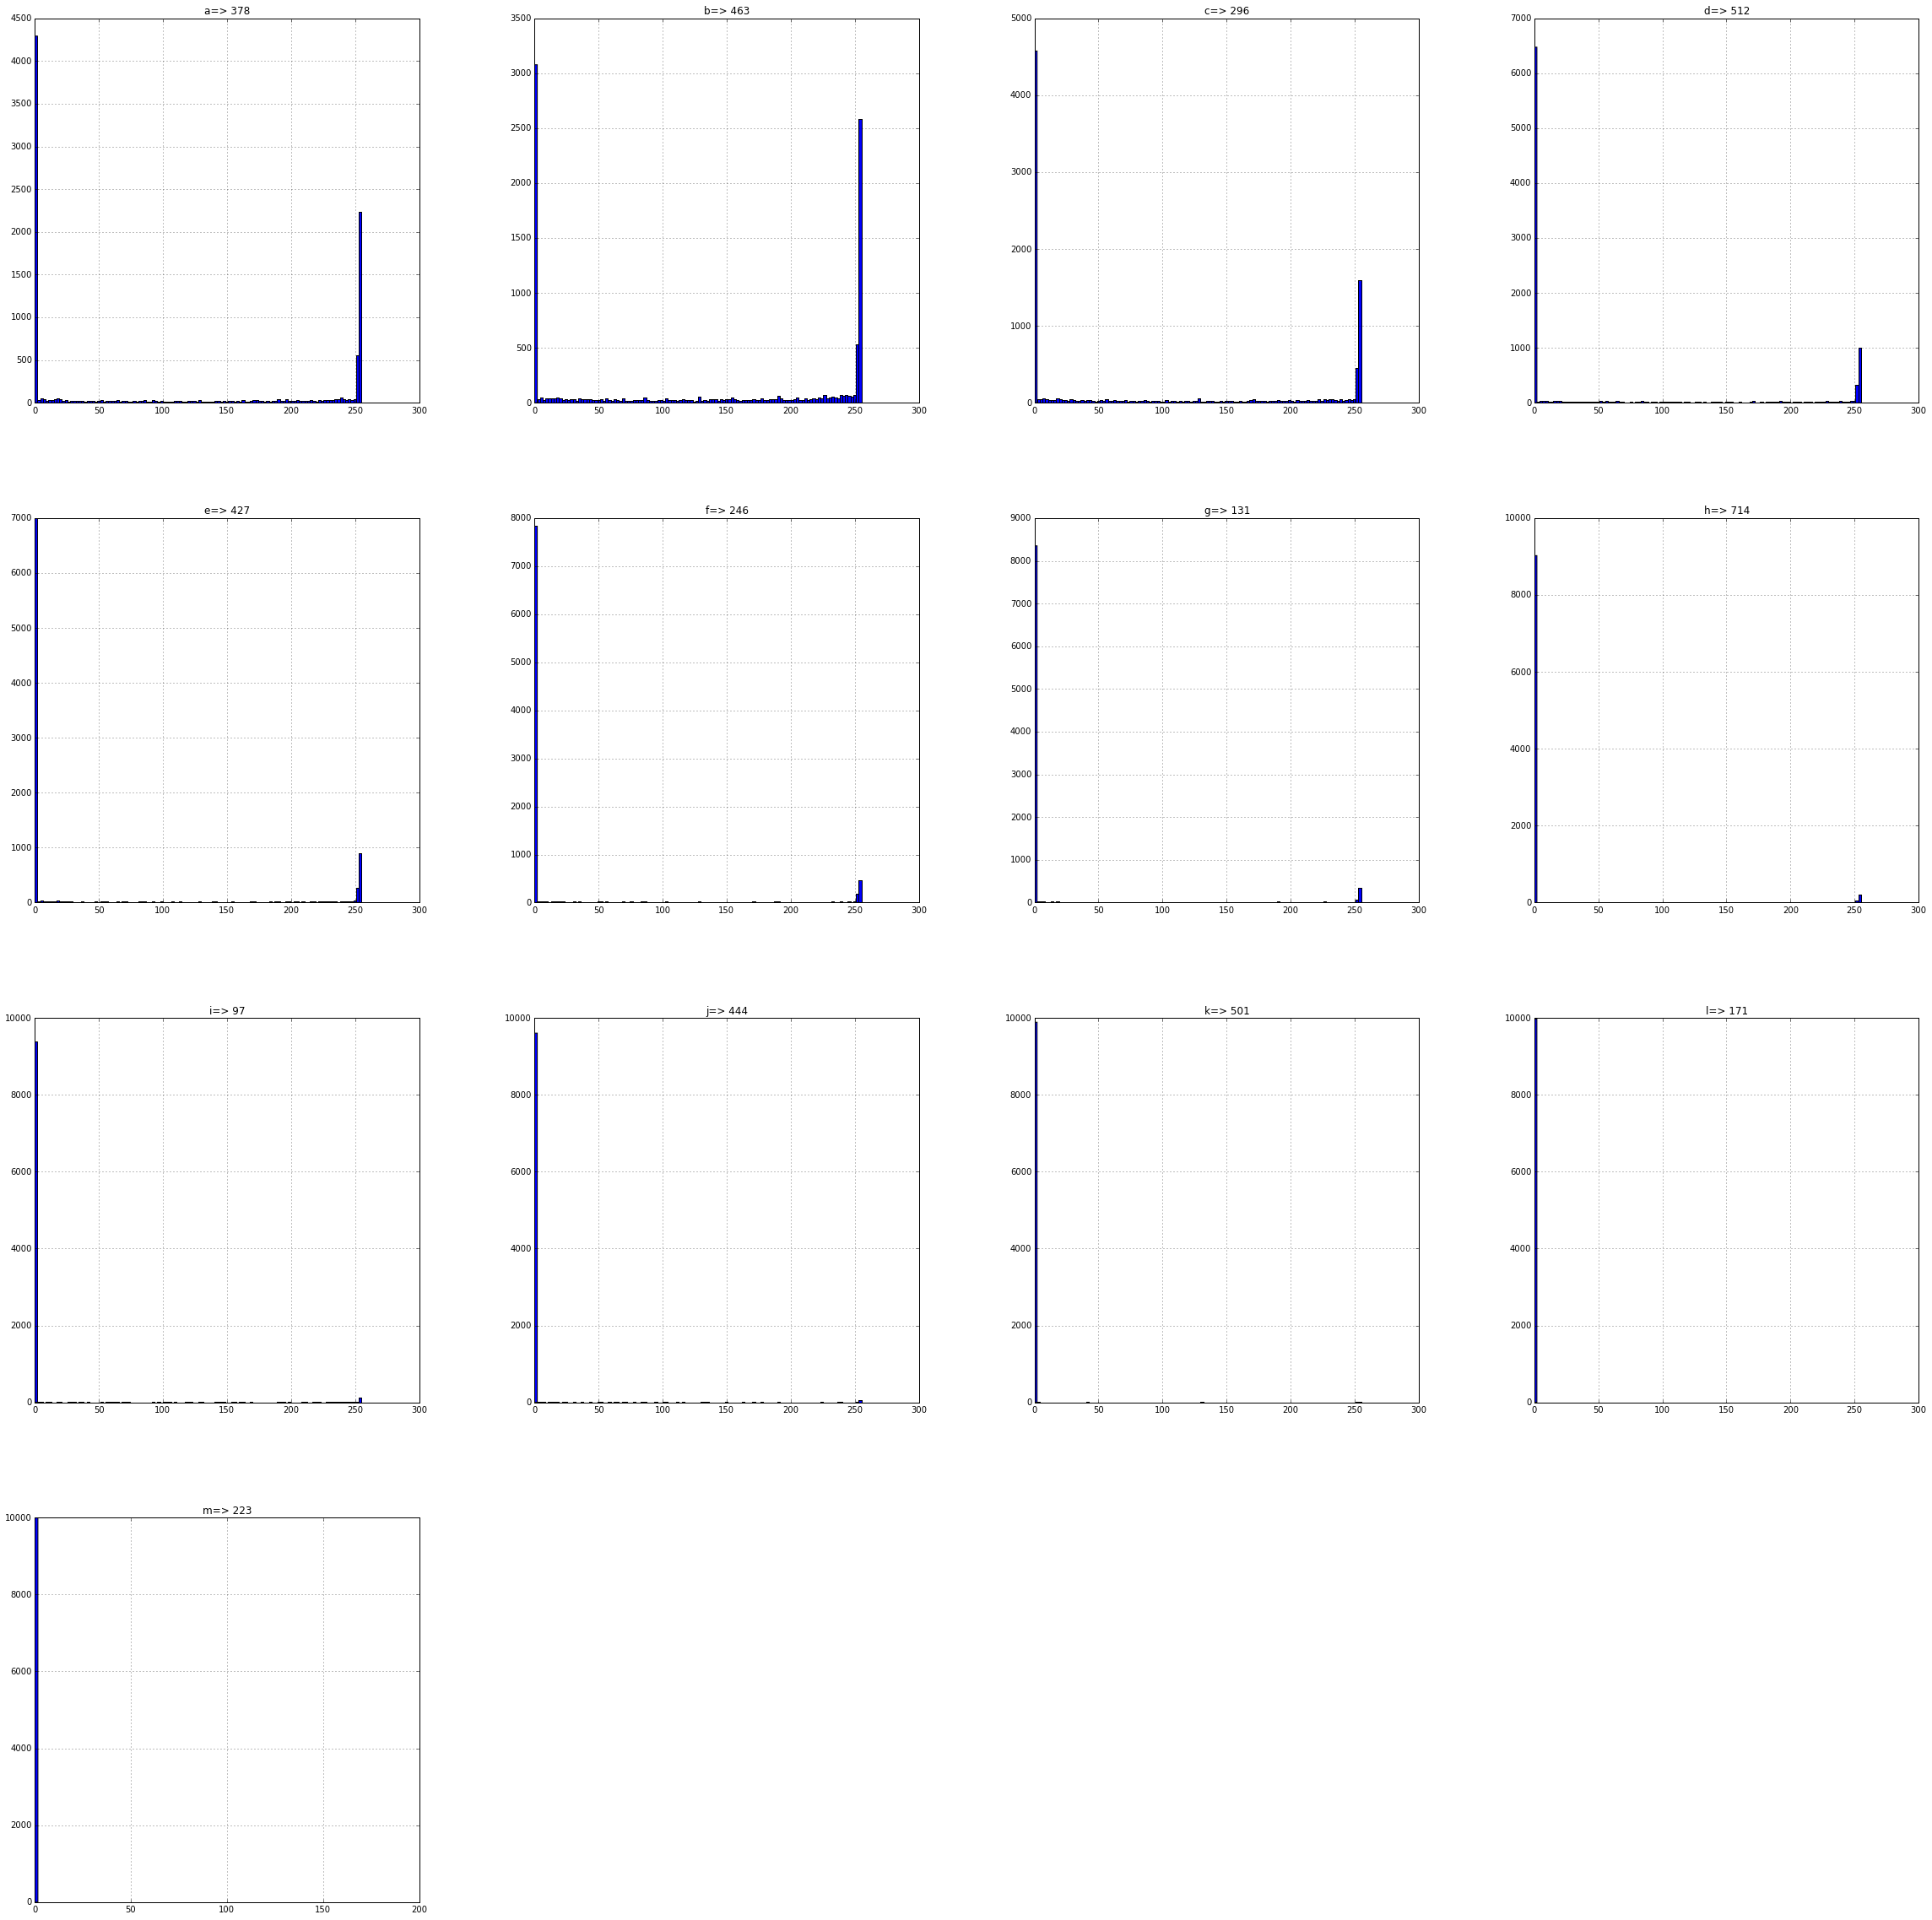

In [129]:
columns = [378,463,296,512,427,246,131,714,97,444,501,171,223]
histX = pd.DataFrame(newX, columns=columns)
histX.columns = [chr(i + ord('a')) + "=> " + str(x) for i, x in enumerate(columns)]
histX.hist(figsize=(40,40),bins=120)
plt.show()

In [240]:
from sklearn import linear_model, ensemble
from sklearn import tree
from sklearn.metrics import mean_squared_error


#model = linear_model.LogisticRegression()
model = ensemble.RandomForestClassifier(max_depth=12, n_estimators=200)
#model = tree.DecisionTreeClassifier(max_depth=8)
# Train the model using the training sets
#model.fit(X_train, y_train)

good_columns = newX.std().round(2).order().index[-400:]

# random forest(max_depth=12, n_estimators=200):
# good_columns 200 - array([ 0.92682927,  0.92416967])
# good_columns 300 - array([ 0.93562575,  0.93277311])
# good_columns 400 - array([ 0.93662535,  0.93197279])

# decision tree(max_depth=8):
# good_columns 30 - array([ 0.66593363,  0.67286915])
# good_columns 50 - array([ 0.66593363,  0.67286915])
# good_columns 100 - array([ 0.72391044,  0.71528611])
# good_columns 200 - array([ 0.77928828,  0.75730292])
# good_columns 300 - array([ 0.77728908,  0.76870748])
# full - array([ 0.77189124,  0.77130852])

# logreg:
# good_columns 100 ~ array([ 0.78648541,  0.777511  ])
# good_columns 200 - array([ 0.80047981,  0.81412565])

# newX.ix[:,:300] - array([ 0.67732907,  0.68087235])
res_crossval = cross_val_score(model, newX[good_columns], y[0], cv=2, scoring='accuracy')
res_crossval

array([ 0.94082367,  0.93757503])

In [4]:
import gc
gc.collect()

accuracy for 32 good columns and 300(?) epoch - 0.81399999999999995
accuracy for 100 good columns and 300 epoch - 0.88200000000000001
accuracy for 400 good columns and 250 epoch - 0.93700000000000006
neural net configuration:
```
good_columns = newX.std().round(2).order().index[-32:]

model = Sequential()
model.add(Dense(len(good_columns), input_dim=len(good_columns), init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, init='uniform', activation='softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)
```

accuracy for 400 good columns and 100 epoch - 0.95
and 50 epoch - 0.93600000000000005
```
model = Sequential()
model.add(Dense(len(good_columns), input_dim=len(good_columns), init='uniform', activation='relu'))

model.add(Dense(15, init='uniform', activation='relu'))

model.add(Dense(10, init='uniform', activation='softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)
```
with SGD optimizer
400 good columns and 50 epoch - 0.95/0.966
400 good columns and 200 epoch - 0.965/0.937

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.optimizers import RMSprop, SGD

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn import preprocessing

good_columns = X.columns#newX.std().round(2).order().index[-400:] # newX.columns

model = Sequential()
model.add(Dense(len(good_columns), input_dim=len(good_columns), init='uniform', activation='relu'))

model.add(Dense(15, init='uniform', activation='relu'))

model.add(Dense(10, init='uniform', activation='softmax'))

#model.add(Dense(1, init='lecun_uniform'))
#model.add(Activation('linear')) #linear output so we can have range of real-valued outputs

rms = RMSprop()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

#scikit_model = KerasClassifier(build_fn=model, nb_epoch=100, batch_size=32)

# res_crossval = cross_val_score(scikit_model, newX[good_columns], y[0], cv=2, scoring='accuracy')
# res_crossval

neuralX = pd.DataFrame(preprocessing.normalize(X[good_columns]))

dummy_y = np_utils.to_categorical(y)

X_train,X_test,y_train,y_test = train_test_split(neuralX.index,dummy_y,test_size=0.1)
a = y_train
b = y_test
X_train = neuralX.iloc[X_train]
X_test = neuralX.iloc[X_test]
#train, test = train_test_split(data, train_size=0.8)

history = model.fit(np.array(X_train), np.array(y_train), nb_epoch=50)

y_pred = model.predict(np.array(X_test))
print y_test
print y_pred

pred = [np.argmax(i) for i in y_pred]
test = [np.argmax(i) for i in y_test]
accuracy_score(test, pred)

Epoch 1/50
9000/9000 [==============================] - 1s - loss: 2.2971     
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 1.7317     
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.6988     
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.4529     
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.3614     
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.3051     
Epoch 7/50
9000/9000 [==============================] - 1s - loss: 0.2605     
Epoch 8/50
9000/9000 [==============================] - 1s - loss: 0.2273     
Epoch 9/50
9000/9000 [==============================] - 1s - loss: 0.1964     
Epoch 10/50
9000/9000 [==============================] - 1s - loss: 0.1699     
Epoch 11/50
9000/9000 [==============================] - 1s - loss: 0.1466     
Epoch 12/50
9000/9000 [==============================] - 1s - loss: 0.1258     
Epoch 13/50
9000/9000 [==========================

0.95799999999999996

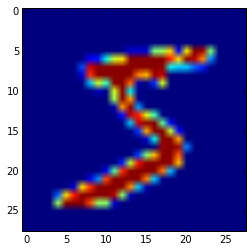

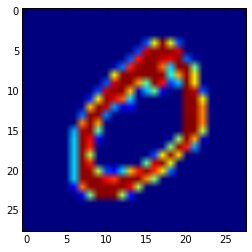

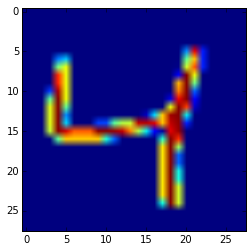

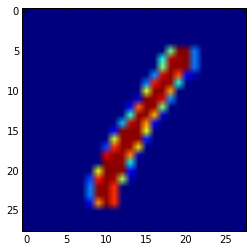

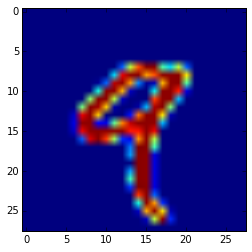

In [225]:
for index, row in X[:5].iterrows():
    image = np.array(row)
    image.shape = (28, 28)
    plt.imshow(image)
    plt.show()

In [175]:
np.array(X[:3])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])